<!-- Create the front page -->

<!-- Load the USB logo -->
<center><img crossorigin="anonymous" src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/USB_logo.svg/800px-USB_logo.svg.png" class="svg" width="150" ><center>

<!-- Put the letterhead -->
<h5><center>UNIVERSIDAD SIMÓN BOLÍVAR</center></h5>
<h5><center>DEPARTAMENTO DE MECÁNICA</center></h5>
<h5><center>VIBRACIONES MECÁNICAS MC-2415</center></h5>
<h5><center>PROFESOR: BORIS BOSSIO</center></h5>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<!-- Title -->
<h5><center><b>PROYECTO 2. MODELADO DE UN SISTEMA LEVA-BARRA-BLOQUE-RESORTE-AMORTIGUADOR<b></center></h5>


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<!-- Student information and date -->
<h5><center>Realizado por:</center></h5>
<h5><center>15-10252 Castellano Pedro:</center></h5>
<h5><center>15-10725 Inojosa Steven:</center></h5>
<h5><center>17-10071 Borges Sinais:</center></h5>
<br>
<h5><center>Sartenejas, Junio 2022</center></h5>


<h5><b> Enunciado </b><br>
Se aprecia, en primer lugar, una leva que impone un movimiento a una barra -no rigida- unida a un bloque de masa $M=1$ kg. El bloque está unido, en uno de sus extremos, a un resorte de constante elástica $K=5$ N/m y a un amortiguador de constante c. El bloque desliza sobre una superficie horizontal y no vuelca. El contacto entre el bloque y la superficie es liso. Note que la forma de la leva es tal que el radio crece linealmente con el ángulo de rotación, entre el valor "$e$" y el valor $R = 20$ cm. La leva rota con cierta velocidad angular $\Omega(t)$ que varía según la Ley de Movimiento que se muestra en la figura 1. Considere que la rigidez de la barra es iqual a $K_b=15$ N/m y que su masa es despreciable. Usted debe considerar dos casos para encontrar la respuesta de su modelo: Caso A) $\zeta=0$ y Caso B) $\zeta=0.02$.<br>
Para cada caso: <br><h5>

* Muestre la ecuación de movimiento del sistema e indique cual(es) método(s) numérico(s) fue (ron)
empleado(s) para obtener la respuesta del sistema.
* Grafique el desplazamiento y la velocidad absoluta del bloque en función del tiempo (para $0 < t < 200s$)
* Grafique la función de la excitación del sistema $z(t)$.
* Grafique el desplazamiento del bloque en régimen permanente.

<!-- Insert figure -->
<center><b>Figura 1. Sistema a modelar.<b></center>
<center><img src="https://drive.google.com/uc?export=view&id=1TfRukUjUFW_E33dtDOFPFTAoNXghzRqB" width="300"><center/><br>
<center><img src="https://drive.google.com/uc?export=view&id=1iqQBXtPfghLnFgR0VbkDcy0aFohxq3wP" width="300"><center/><br>






In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, pi
from numpy import heaviside as H
from scipy.integrate import odeint

In [ ]:
# Datos y constantes para el problema
R  = 20/100            # [m]
M  = 1                 # [kg]
K  = 5                 # [N/m]
Kb = 15                # [N/m]
wn = sqrt( (K+Kb)/M )  # Frecuencia Natural
dseta_A = 0            # [-]
dseta_B = 0.02         # [-]
S0 = [0,0]             # Condiciones iniciales [X0, V0]

# Definimos la función de excitación 
def Z(t):
  return R/(2*pi) * ( H( 40-t, 1) * ( (pi*t**2/40)      % (2*pi) ) +          
                      H( t-40, 0) * ( (2*pi*t - 40*pi) % (2*pi) ) )

# Definimos la ecuacion diferencial caso A
def Pdot_A (P, t): 
  return [ P[1], (Kb/M)*Z(t) - 2*dseta_A*wn*P[1] - wn**2*P[0] ]

# Definimos la ecuacion diferencial caso B
def Pdot_B (P, t): 
  return [ P[1], (Kb/M)*Z(t) - 2*dseta_B*wn*P[1] - wn**2*P[0] ]

In [ ]:
# Resolución de las EDOs
time = np.arange(0,200,0.01)
P_A = odeint(Pdot_A, S0, time ) # Solucion caso A
P_B = odeint(Pdot_B, S0, time ) # Solucion caso B

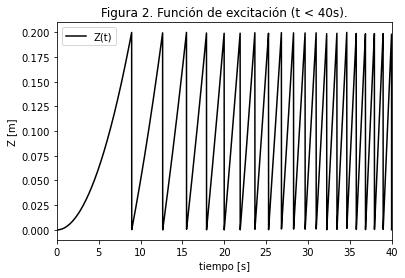

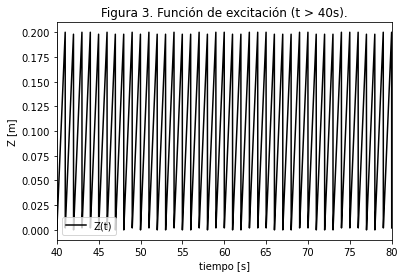

In [ ]:
# @title <h2><b> Gráficas de la función de Excitación </b></h2>

# Gráficas de la función de Excitación
plt.plot(time, Z(time), '-k', label = "Z(t)")
plt.xlabel("tiempo [s]")
plt.ylabel("Z [m]")
plt.title("Figura 2. Función de excitación (t < 40s).")
plt.xlim([0,40])
plt.legend()
plt.show()

plt.plot(time, Z(time), '-k', label = "Z(t)")
plt.xlabel("tiempo [s]")
plt.ylabel("Z [m]")
plt.title("Figura 3. Función de excitación (t > 40s).")
plt.xlim([40,80])
plt.legend()
plt.show()

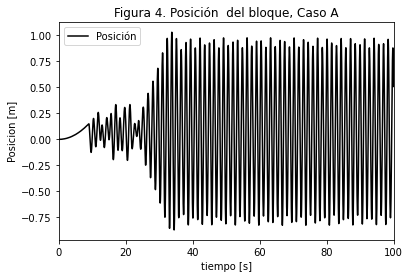

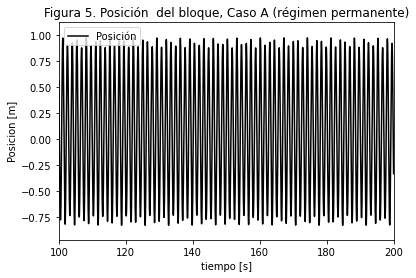

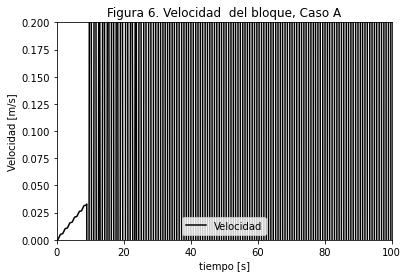

In [ ]:
# @title <h2><b> Gráficas para el caso A </b></h2>

# Gráfico de posición del bloque - Caso A
plt.plot(time, P_A[:,0], '-k', label = "Posición")
plt.xlabel("tiempo [s]")
plt.ylabel("Posicion [m]")
plt.title("Figura 4. Posición  del bloque, Caso A")
plt.xlim([0,100])
plt.legend()
plt.show()

# Gráfico de posición del bloque - Caso A (régimen permanente)
plt.plot(time, P_A[:,0], '-k', label = "Posición")
plt.xlabel("tiempo [s]")
plt.ylabel("Posicion [m]")
plt.title("Figura 5. Posición  del bloque, Caso A (régimen permanente)")
plt.xlim([100,200])
plt.legend()
plt.show()

# Gráfico de velocidad del bloque - Caso A
plt.plot(time, P_A[:,1], '-k', label = "Velocidad")
plt.xlabel("tiempo [s]")
plt.ylabel("Velocidad [m/s]")
plt.title("Figura 6. Velocidad  del bloque, Caso A")
plt.xlim([0,100])
plt.ylim([0,0.2])
plt.legend()
plt.show()



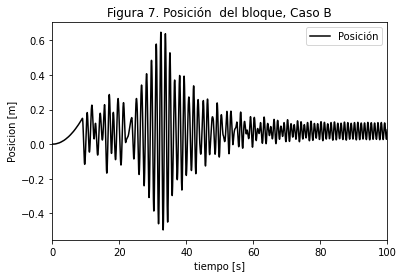

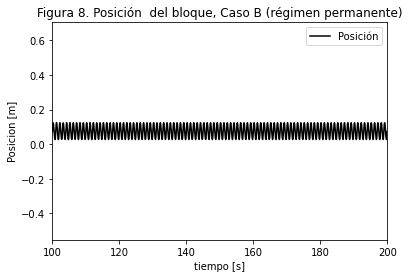

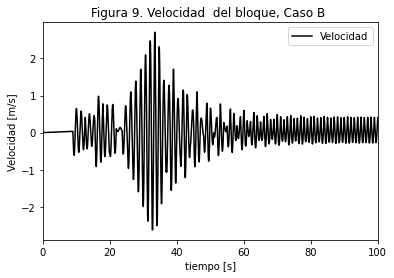

In [ ]:
# @title <h2><b> Gráficas para el caso B </b></h2>

# Gráfico de posición del bloque - Caso B
plt.plot(time, P_B[:,0], '-k', label = "Posición")
plt.xlabel("tiempo [s]")
plt.ylabel("Posicion [m]")
plt.title("Figura 7. Posición  del bloque, Caso B")
plt.xlim([0,100])
plt.legend()
plt.show()

# Gráfico de posición del bloque - Caso B
plt.plot(time, P_B[:,0], '-k', label = "Posición")
plt.xlabel("tiempo [s]")
plt.ylabel("Posicion [m]")
plt.title("Figura 8. Posición  del bloque, Caso B (régimen permanente)")
plt.xlim([100,200])
plt.legend()
plt.show()

# Gráfico de velocidad del bloque - Caso B
plt.plot(time, P_B[:,1], '-k', label = "Velocidad")
plt.xlabel("tiempo [s]")
plt.ylabel("Velocidad [m/s]")
plt.title("Figura 9. Velocidad  del bloque, Caso B ")
plt.xlim([0,100])
plt.legend()
plt.show()

In [ ]:
# Resolución de las EDOs

time1 = np.arange(0,200,0.01)
P_A1 = odeint(Pdot_A, S0, time1 ) # Solucion caso A
P_B1 = odeint(Pdot_B, S0, time1 ) # Solucion caso B

time2 = np.arange(0,200,0.02)
P_A2 = odeint(Pdot_A, S0, time2 ) # Solucion caso A
P_B2 = odeint(Pdot_B, S0, time2 ) # Solucion caso B

time4 = np.arange(0,200,0.04)
P_A4 = odeint(Pdot_A, S0, time4 ) # Solucion caso A
P_B4 = odeint(Pdot_B, S0, time4 ) # Solucion caso B

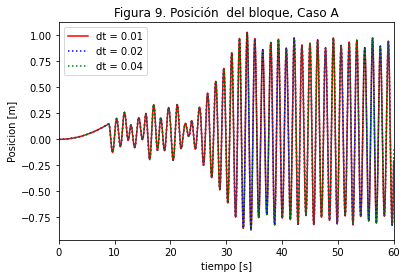

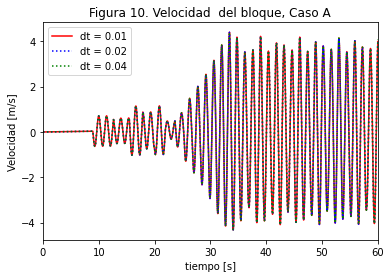

In [ ]:


# @title <h2><b> Convergencia caso A </b><h5>

# Gráficas caso A
plt.plot(time1, P_A1[:,0], '-r', label = "dt = 0.01")
plt.plot(time2, P_A2[:,0], ':b', label = "dt = 0.02")
plt.plot(time4, P_A4[:,0], ':g', label = "dt = 0.04")
plt.xlabel("tiempo [s]")
plt.ylabel("Posicion [m]")
plt.title("Figura 9. Posición  del bloque, Caso A")
plt.xlim([0,60])
plt.legend()
plt.show()

plt.plot(time1, P_A1[:,1], '-r', label = "dt = 0.01")
plt.plot(time2, P_A2[:,1], ':b', label = "dt = 0.02")
plt.plot(time4, P_A4[:,1], ':g', label = "dt = 0.04")
plt.xlabel("tiempo [s]")
plt.ylabel("Velocidad [m/s]")
plt.title("Figura 10. Velocidad  del bloque, Caso A")
plt.xlim([0,60])
plt.legend()
plt.show()

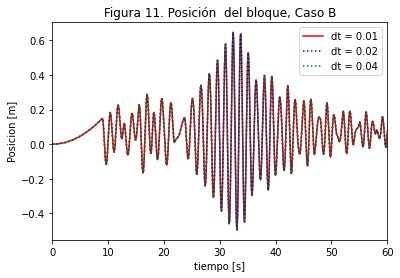

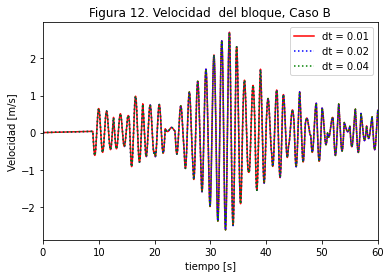

In [ ]:
# @title <h2><b> Convergencia caso B </b><h5>

# Gráficas caso B
plt.plot(time1, P_B1[:,0], '-r', label = "dt = 0.01")
plt.plot(time2, P_B2[:,0], ':b', label = "dt = 0.02")
plt.plot(time4, P_B4[:,0], ':g', label = "dt = 0.04")
plt.xlabel("tiempo [s]")
plt.ylabel("Posicion [m]")
plt.title("Figura 11. Posición  del bloque, Caso B")
plt.xlim([0,60])
plt.legend()
plt.show()

plt.plot(time1, P_B1[:,1], '-r', label = "dt = 0.01")
plt.plot(time2, P_B2[:,1], ':b', label = "dt = 0.02")
plt.plot(time4, P_B4[:,1], ':g', label = "dt = 0.04")
plt.xlabel("tiempo [s]")
plt.ylabel("Velocidad [m/s]")
plt.title("Figura 12. Velocidad  del bloque, Caso B")
plt.xlim([0,60])
plt.legend()
plt.show()